In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [2]:
# open glass dataset file
file = open('glass.txt', "r")

# read samples from dataset file
data = []

for f in file:
    x = f.split()
    s = x[0].split(',')
    s = [float(i) for i in s]
    data.append(s)

# converting data into dataframe
glass_df = pd.DataFrame(data, columns = ['0','1','2','3','4','5','6','7','8','9','class'])
del glass_df['0']   # as question wanted
glass_df = glass_df.astype({'class':'int'})
glass_df.head()

,1,2,3,4,5,6,7,8,9,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# open tic-tac-toe dataset file
file = open('tic-tac-toe.txt', "r")

# read samples from dataset file
data = []

for f in file:
    x = f.split()
    x = [int(i) for i in x]
    data.append(x)

tic_tac_df = pd.DataFrame(data, columns = ['1','2','3','4','5','6','7','8','9','class'])
tic_tac_df.head()

,1,2,3,4,5,6,7,8,9,class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


# Split test/train

In [4]:
def feature_label_extraction(df):
    X = df[['1','2','3','4','5','6','7','8','9']]
    y = df['class']
    return X, y

In [5]:
def test_train_split(X, y):
    # 70% of data should be used as training set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    print('X_train shape:', X_train.shape)
    print('y_train shape:', y_train.shape)
    print('X_test shape:', X_test.shape)
    print('y_test shape:', y_test.shape)
    
    return X_train, X_test, y_train, y_test

# Part B - Attribute Noise

## Model

In [6]:
def decision_tree_model(X_train, y_train):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    return clf

In [7]:
def prediction(clf, X_test, y_test):
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    return acc

## Add Noise

In [8]:
def add_attribute_noise(X, noise_level):
    return X + np.random.multivariate_normal(np.zeros((X.shape[1],)), X.cov()*noise_level, X.shape[0])

## Clean Vs Dirty

In [9]:
def clean_dirty_model_predict(c_X_train, c_X_test, y_train, y_test):
    
    # C vs C
    # Clean training set Vs Clean test set
    c_clf = decision_tree_model(c_X_train, y_train)
    acc_cc = prediction(c_clf, c_X_test, y_test)
    acc_cc = [acc_cc]*3
    print('CvsC Accuracy:', acc_cc)
    
    noise_level = [0.05, 0.1, 0.15]
    
    # D vs C
    # Dirty training set Vs Clean test set
    acc_dc = []
    d_clf_list = []
    for nl in noise_level:
        d_X_train = add_attribute_noise(c_X_train, nl)
        d_clf = decision_tree_model(d_X_train, y_train)
        d_clf_list.append(d_clf)
        acc = prediction(d_clf, c_X_test, y_test)
        acc_dc.append(acc)
    print('DvsC Accuracy:', acc_dc)
    
    # C vs D
    # Clean training set Vs Dirty test set
    acc_cd = []
    d_X_test_list = []
    for nl in noise_level:
        d_X_test = add_attribute_noise(c_X_test, nl)
        d_X_test_list.append(d_X_test)
        acc = prediction(c_clf, d_X_test, y_test)
        acc_cd.append(acc)
    print('CvsD Accuracy:', acc_cd)
    
    # D vs D
    # Dirty training set Vs Dirty test set
    acc_dd = []
    for i in range(len(noise_level)):
        acc = prediction(d_clf_list[i], d_X_test_list[i], y_test)
        acc_dd.append(acc)
    print('DvsD Accuracy:', acc_dd)
    
    # Plot accuracy in each attribute-noise level
    plt.plot(noise_level, acc_cc, label='CvsC')
    plt.plot(noise_level, acc_cd, label='CvsD')
    plt.plot(noise_level, acc_dc, label='DvsC')
    plt.plot(noise_level, acc_dd, label='DvsD')
    plt.xlabel('attribute-noise level')
    plt.ylabel('accuracy')
    plt.legend()

## 1. glass dataframe

In [40]:
glass_df.shape

(214, 10)

In [41]:
X, y = feature_label_extraction(glass_df)
c_X_train, c_X_test, y_train, y_test = test_train_split(X, y)

X_train shape: (149, 9)
y_train shape: (149,)
X_test shape: (65, 9)
y_test shape: (65,)


CvsC Accuracy: [0.676923076923077, 0.676923076923077, 0.676923076923077]
DvsC Accuracy: [0.6615384615384615, 0.6, 0.5846153846153846]
CvsD Accuracy: [0.6, 0.5230769230769231, 0.5230769230769231]
DvsD Accuracy: [0.5384615384615384, 0.5230769230769231, 0.47692307692307695]


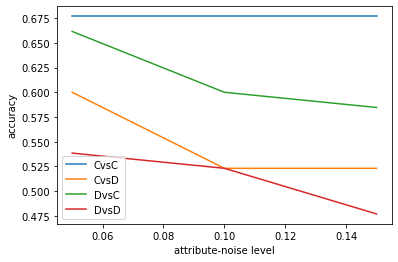

In [56]:
clean_dirty_model_predict(c_X_train, c_X_test, y_train, y_test)

## 2. tic-tac-toe dataframe

In [37]:
tic_tac_df.shape

(958, 10)

In [38]:
X, y = feature_label_extraction(tic_tac_df)
c_X_train, c_X_test, y_train, y_test = test_train_split(X, y)

X_train shape: (670, 9)
y_train shape: (670,)
X_test shape: (288, 9)
y_test shape: (288,)


CvsC Accuracy: [0.9513888888888888, 0.9513888888888888, 0.9513888888888888]
DvsC Accuracy: [0.9305555555555556, 0.8680555555555556, 0.8611111111111112]
CvsD Accuracy: [0.9479166666666666, 0.8888888888888888, 0.8923611111111112]
DvsD Accuracy: [0.8923611111111112, 0.8020833333333334, 0.7604166666666666]


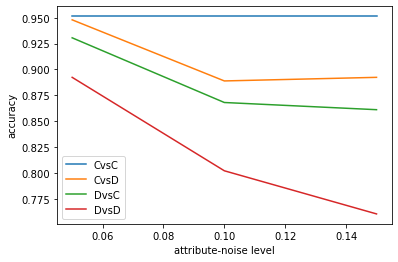

In [39]:
clean_dirty_model_predict(c_X_train, c_X_test, y_train, y_test)